# 03 - Visualisieren der Chipotle's Data

Wir laden die Daten direkt aus dem Internet.
Danke an: https://github.com/justmarkham für die Bereitstellung der Materialien.

### Step 1. Importieren der notwendigen Pakete.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Importiere das Datenset von folgender [Adresse](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [4]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep="\t")
chipo["item_price"] = chipo.item_price.str.slice(start=1).astype(float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


### Step 3. Generiere ein Balkendiagramm für die Bestellhäufigkeit der 5 meistbestellten Produkte

<AxesSubplot:xlabel='item_name'>

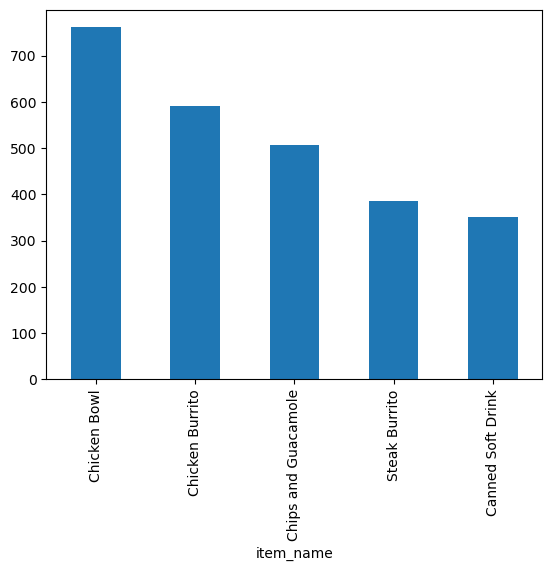

In [42]:
df_temp = chipo.groupby("item_name")["quantity"].sum()
df_temp = df_temp.sort_values(ascending=False).head(5)
df_temp
df_temp.plot(kind="bar")

In [43]:
df_temp

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

In [40]:
df_temp = df_temp.to_frame().reset_index()

<AxesSubplot:xlabel='item_name'>

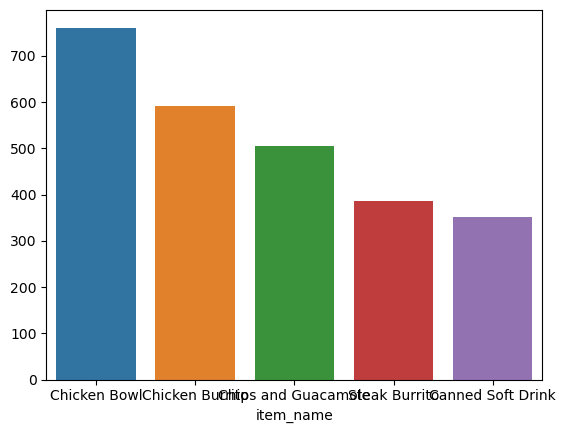

In [54]:
sns.barplot(x=df_temp.index, y=df_temp.values)

### Step 4. Generiere einen Scatterplot der zu jedem Gesamtpreis einer Bestellung die Anzahl der bestellten Produkte gegenüberstellt.
#### Hinweis: X-Achse: Preis, Y-Achse: Anzahl der Produkte

In [55]:
df_temp = chipo.groupby("order_id")[["item_price", "quantity"]].sum()

In [58]:
df_temp

,item_price,quantity
order_id,,
1,11.56,4
2,16.98,2
3,12.67,2
4,21.00,2
5,13.70,2
...,...,...
1830,23.00,2
1831,12.90,3
1832,13.20,2


<AxesSubplot:xlabel='item_price', ylabel='quantity'>

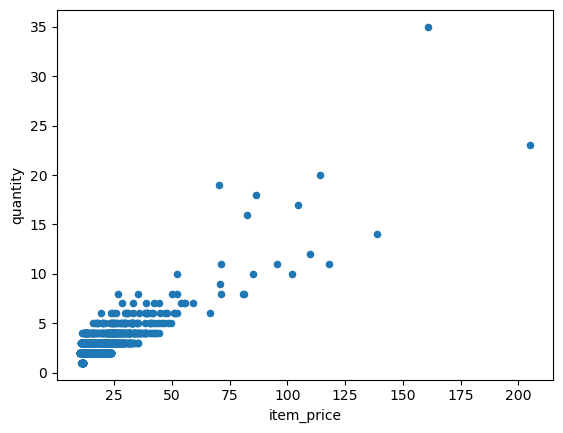

In [60]:
df_temp.plot(kind="scatter", x="item_price", y="quantity")

<AxesSubplot:xlabel='item_price', ylabel='quantity'>

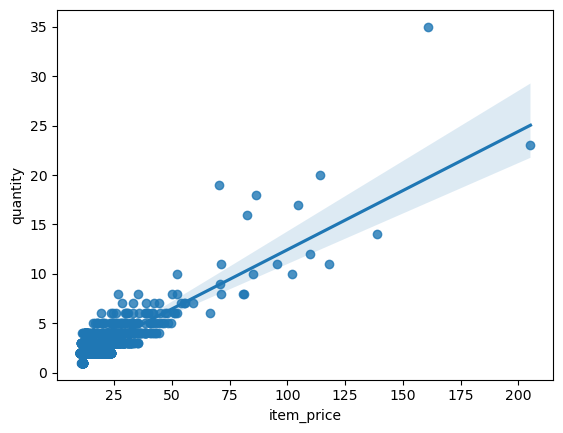

In [72]:
sns.regplot(data=df_temp, x="item_price", y="quantity", fit_reg=True)